## **InsuraPredict:Empowering Insurance with Predictive Intelligence**


Team 
Nasser Mohamed Amin
Badri Oumayma

---

**Importing Libraries**

In [17]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import  cross_val_score, cross_validate
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.utils import shuffle


## **Data Loading**
---

**Loading the insurance data**

In [18]:
Insurance_df=pd.read_csv("train_Insurance.csv")
Insurance_df

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,H14962,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non
2,H17755,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui
3,H13369,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui
4,H12988,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,H13682,2013,1.0,0,N,V,V,U,550.0,Ordinary,without,33063,oui
5008,H18342,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,13004,non
5009,H16892,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,94059,non
5010,H18805,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,74243,non


**Display basic information about the dataset**

In [19]:
Insurance_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         5012 non-null   object 
 1   YearOfObservation   5012 non-null   int64  
 2   Insured_Period      5012 non-null   float64
 3   Residential         5012 non-null   int64  
 4   Building_Painted    5012 non-null   object 
 5   Building_Fenced     5012 non-null   object 
 6   Garden              5008 non-null   object 
 7   Settlement          5012 non-null   object 
 8   Building Dimension  4935 non-null   float64
 9   Building_Type       5012 non-null   object 
 10  NumberOfWindows     5012 non-null   object 
 11  Geo_Code            4939 non-null   object 
 12  Claim               5012 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 509.2+ KB


**Display statistical summary of the dataset**

In [20]:
Insurance_df.describe(include="all")

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
count,5012,5012.000000,5012.000000,5012.000000,5012,5012,5008,5012,4935.000000,5012,5012,4939,5012
unique,5012,NaN,NaN,NaN,2,2,2,2,NaN,4,11,1115,2
top,H18228,NaN,NaN,NaN,V,N,O,R,NaN,Non-combustible,without,6088,non
freq,1,NaN,NaN,NaN,3763,2535,2532,2537,NaN,2310,2476,102,3886
mean,NaN,2013.660215,0.869713,0.301077,NaN,NaN,NaN,NaN,1876.898683,NaN,NaN,NaN,NaN
std,NaN,1.383134,0.219496,0.458772,NaN,NaN,NaN,NaN,2267.277397,NaN,NaN,NaN,NaN
min,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,520.000000,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,1067.000000,NaN,NaN,NaN,NaN
75%,NaN,2015.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2280.000000,NaN,NaN,NaN,NaN


## **Data Preprocessing**
---

**Rename columns for better readability**

In [21]:
Insurance_df.rename(columns={'YearOfObservation':'Year_Of_Observation','Building Dimension':'Building_Dimension','NumberOfWindows':'Number_Of_Windows'},inplace=True)


**Drop the 'Customer Id' column as it is not relevant for analysis**

In [22]:
Insurance_df=Insurance_df.drop(columns=['Customer Id'])
Insurance_df

,Year_Of_Observation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Number_Of_Windows,Geo_Code,Claim
0,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non
2,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui
3,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui
4,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...
5007,2013,1.0,0,N,V,V,U,550.0,Ordinary,without,33063,oui
5008,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,13004,non
5009,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,94059,non
5010,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,74243,non


**Check for duplicate rows**

In [23]:
df1=Insurance_df[Insurance_df.duplicated()]
df1.head()
df1.shape

(42, 12)

**Remove duplicates from the dataset**

In [24]:
Insurance_df.drop_duplicates(inplace=True,ignore_index=True)

**Check for missing values in each column**

In [25]:
Insurance_df.isnull().sum()

Year_Of_Observation     0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building_Dimension     45
Building_Type           0
Number_Of_Windows       0
Geo_Code               41
Claim                   0
dtype: int64

In [26]:
Insurance_df.shape

(4970, 12)

**Check the number of unique geographic codes**

In [27]:
Insurance_df["Geo_Code"].nunique()

1115

In [28]:
Insurance_df

,Year_Of_Observation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Number_Of_Windows,Geo_Code,Claim
0,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non
2,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui
3,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui
4,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...
4965,2013,1.0,0,N,V,V,U,550.0,Ordinary,without,33063,oui
4966,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,13004,non
4967,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,94059,non
4968,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,74243,non


**Impute missing values in 'Geo_Code' with the most frequent value**

In [29]:
mf_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
arr=mf_imputer.fit_transform(Insurance_df.loc[:,['Geo_Code']])
Insurance_df[['Geo_Code']]=arr

**Impute missing values in 'Garden' with the most frequent value**

In [30]:
mf_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
arr=mf_imputer.fit_transform(Insurance_df.loc[:,['Garden']])
Insurance_df[['Garden']]=arr

In [31]:
Insurance_df.isnull().sum()

Year_Of_Observation     0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  0
Settlement              0
Building_Dimension     45
Building_Type           0
Number_Of_Windows       0
Geo_Code                0
Claim                   0
dtype: int64

**Distribution of building dimensions**

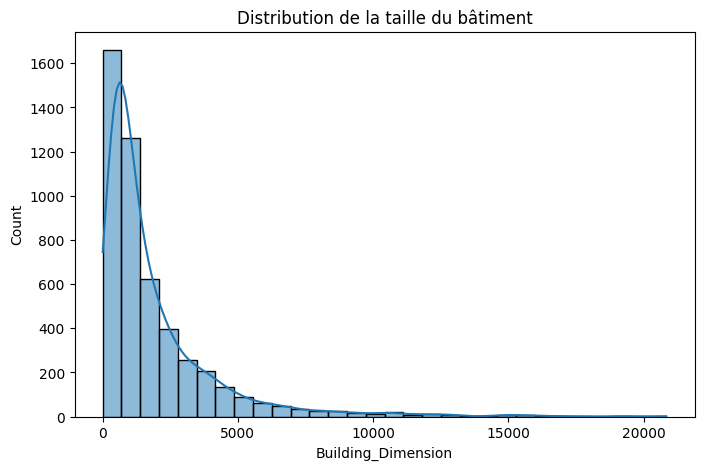

In [32]:

plt.figure(figsize=(8, 5))
sns.histplot(Insurance_df['Building_Dimension'], kde=True, bins=30)
plt.title("Distribution de la taille du bâtiment")
plt.show()

**Impute missing values in 'Building_Dimension' with the median**

In [33]:
mf_imputer = SimpleImputer(missing_values=np.nan,strategy='median')
arr=mf_imputer.fit_transform(Insurance_df.loc[:,['Building_Dimension']])
Insurance_df[['Building_Dimension']]=arr
Insurance_df.isnull().sum()

Year_Of_Observation    0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 0
Settlement             0
Building_Dimension     0
Building_Type          0
Number_Of_Windows      0
Geo_Code               0
Claim                  0
dtype: int64

**Define categories for ordinal encoding of certain features**

In [34]:
ord_categories=[["N","V"],["N","V"],["O","V"],['U','R'],['Fire-resistive', 'Non-combustible', 'Ordinary', 'Wood-framed']]
enc1 = OrdinalEncoder(categories=ord_categories)
Insurance_df[["Building_Painted","Building_Fenced","Garden",'Settlement','Building_Type']]=enc1.fit_transform(Insurance_df.loc[:,["Building_Painted", "Building_Fenced","Garden",'Settlement','Building_Type']])
Insurance_df

,Year_Of_Observation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Number_Of_Windows,Geo_Code,Claim
0,2012,1.0,1,0.0,1.0,1.0,0.0,1240.0,3.0,without,75117,non
1,2012,1.0,0,0.0,1.0,1.0,0.0,900.0,1.0,without,62916,non
2,2013,1.0,1,1.0,0.0,0.0,1.0,4984.0,1.0,4,31149,oui
3,2016,0.5,0,0.0,1.0,1.0,0.0,600.0,3.0,without,6012,oui
4,2012,1.0,0,0.0,1.0,1.0,0.0,900.0,1.0,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...
4965,2013,1.0,0,0.0,1.0,1.0,0.0,550.0,2.0,without,33063,oui
4966,2012,0.5,0,1.0,0.0,0.0,1.0,1000.0,0.0,4,13004,non
4967,2015,1.0,1,1.0,0.0,0.0,1.0,480.0,2.0,3,94059,non
4968,2012,0.5,0,1.0,0.0,0.0,1.0,536.0,0.0,4,74243,non


**Replace categorical values in 'Number_Of_Windows' and convert to integer**

In [35]:
Insurance_df["Number_Of_Windows"]=Insurance_df["Number_Of_Windows"].replace({'without':'0','>=10':'10'}).astype('int')
Insurance_df["Number_Of_Windows"].value_counts()

Number_Of_Windows
0     2440
4      665
3      598
5      436
2      245
6      225
7      141
8       84
10      52
1       49
9       35
Name: count, dtype: int64

**Encode the target variable 'Claim' into binary values**

In [36]:
Insurance_df['Claim'] = Insurance_df['Claim'].apply(lambda x: 1 if x == 'oui' else 0)

**Display boxplot to visualize potential outliers in the dataset**

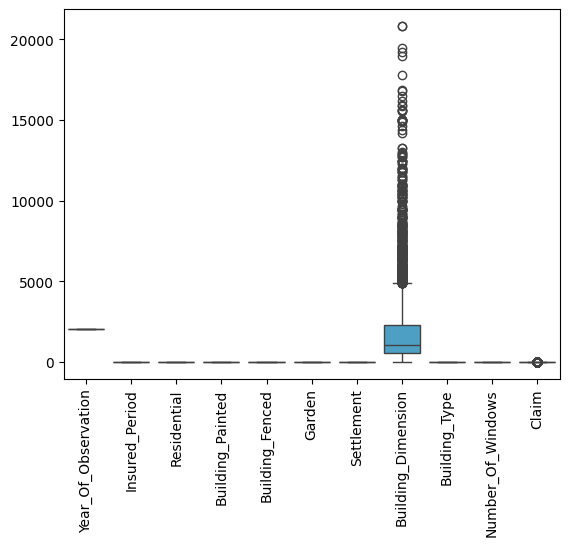

In [37]:
sns.boxplot(data=Insurance_df)
plt.xticks(rotation=90)
plt.show()

**reate a boxplot specifically for 'Building_Dimension'**

In [38]:
Insurance_df.isnull().sum()
Insurance_df.to_csv("cleaned",index=False)

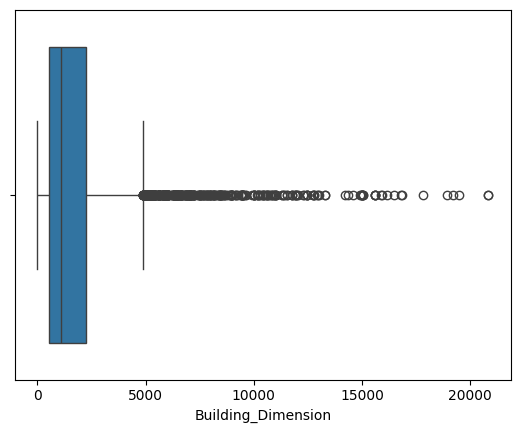

In [39]:
sns.boxplot(data=Insurance_df,x='Building_Dimension')
plt.show()

**Calculate IQR to identify outliers in 'Building_Dimension'**

In [40]:
Q1,Q3=np.percentile(Insurance_df["Building_Dimension"],[25,75])
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
Insurance_df['Building_Dimension']=np.where(Insurance_df['Building_Dimension']>=upper_limit,
upper_limit, np.where(Insurance_df['Building_Dimension']<=lower_limit,
lower_limit,Insurance_df['Building_Dimension']))

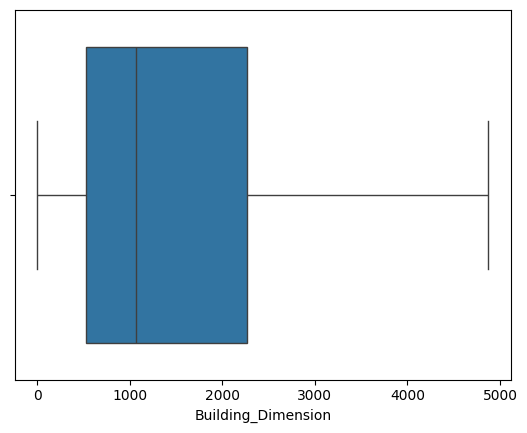

In [41]:
sns.boxplot(data=Insurance_df,x='Building_Dimension')
plt.show()

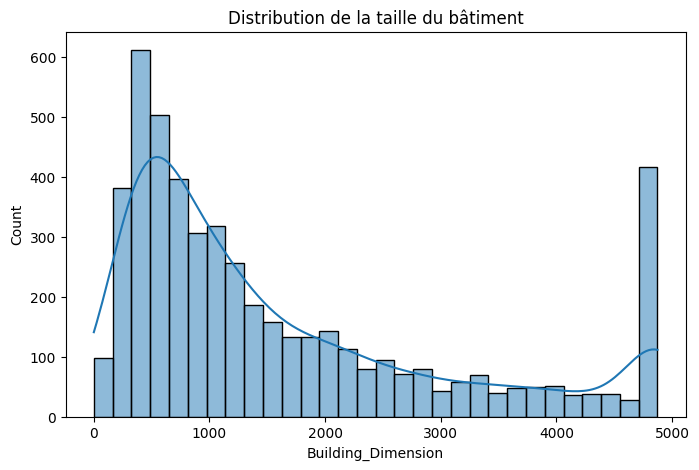

In [42]:
plt.figure(figsize=(8, 5))
sns.histplot(Insurance_df['Building_Dimension'], kde=True, bins=30)
plt.title("Distribution de la taille du bâtiment")
plt.show()

In [43]:
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler

# Apply Box-Cox Transformation
Insurance_df['Building_Dimension_BoxCox'], _ = boxcox(Insurance_df['Building_Dimension'] + 1)  # +1 to avoid zero

# Then apply Min-Max Scaling
scaler = MinMaxScaler(feature_range=(0.1, 0.9))
Insurance_df['Building_Dimension'] = scaler.fit_transform(Insurance_df[['Building_Dimension_BoxCox']])


In [44]:
Insurance_df["Building_Type"].value_counts()

Building_Type
1.0    2281
0.0    1197
2.0     851
3.0     641
Name: count, dtype: int64

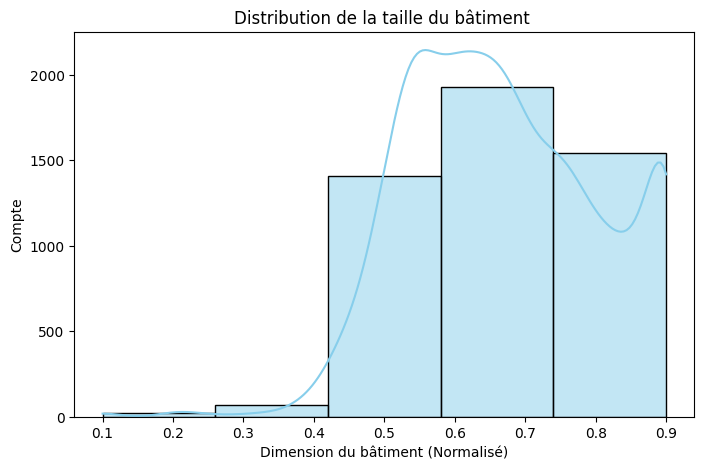

In [45]:
plt.figure(figsize=(8, 5))
sns.histplot(Insurance_df['Building_Dimension'], kde=True, bins=5, color='skyblue', edgecolor='black')
plt.title("Distribution de la taille du bâtiment ")
plt.xlabel("Dimension du bâtiment (Normalisé)")
plt.ylabel("Compte")
plt.show()

**Create subplots to visualize the distribution of categorical variables**

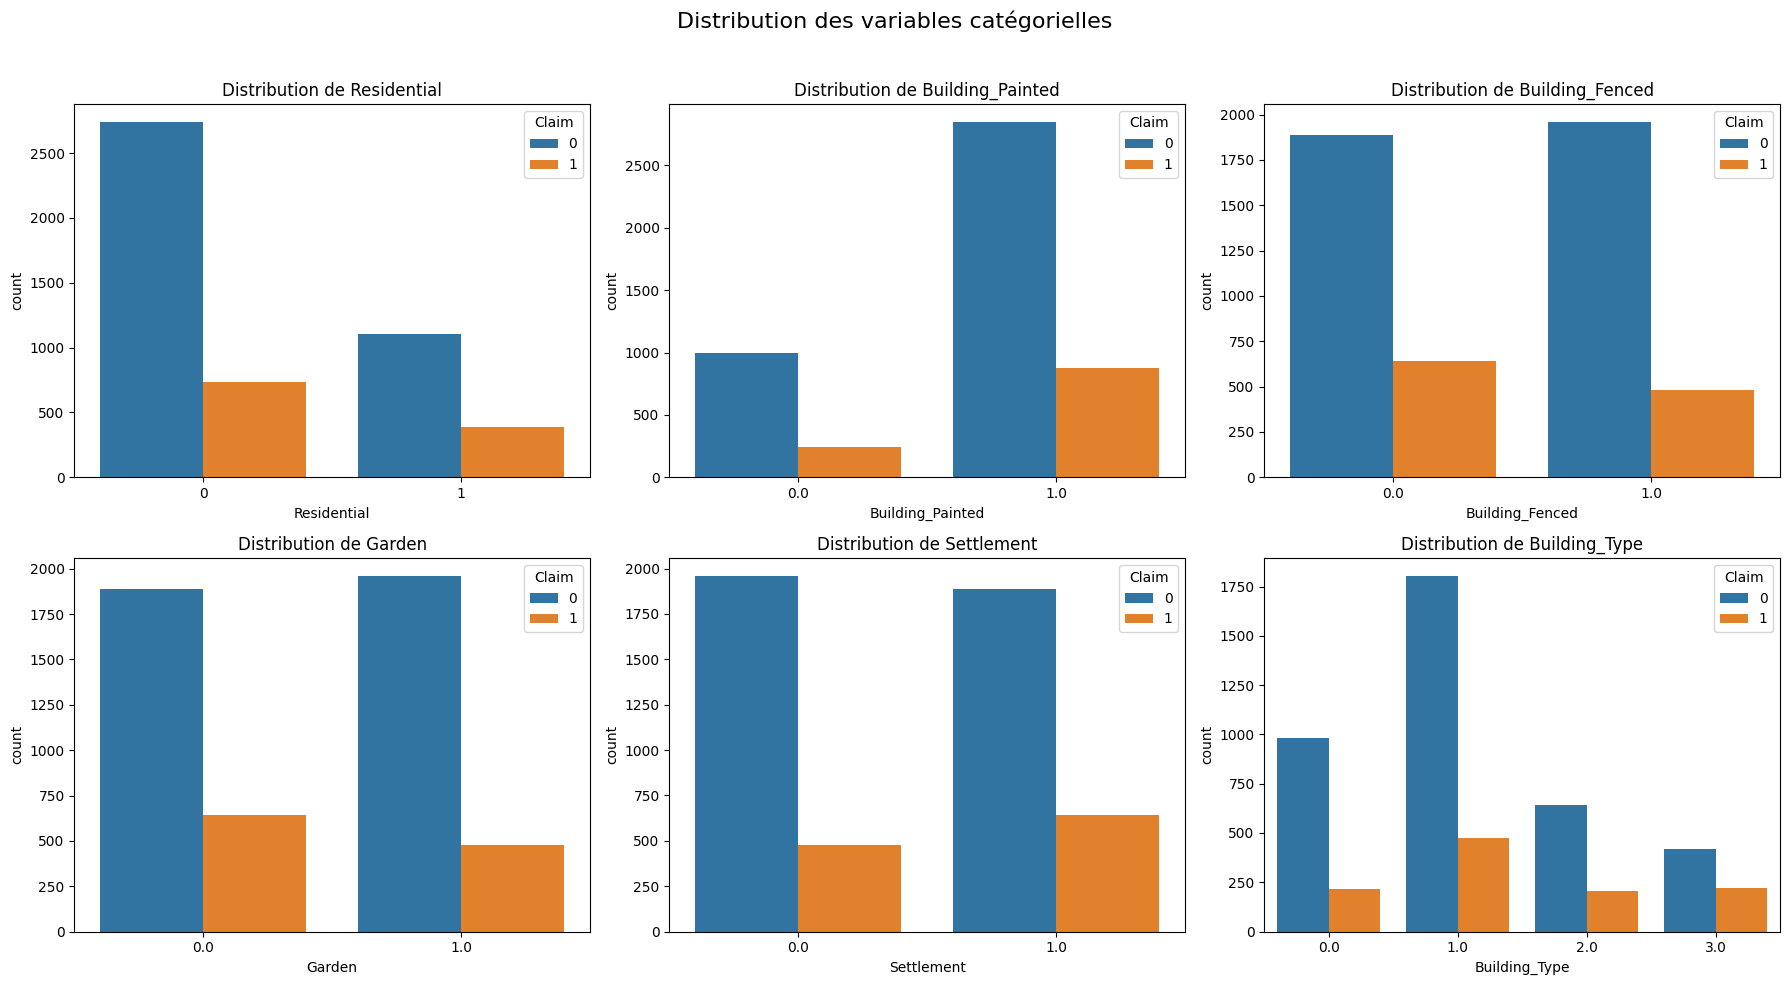

In [46]:
categorical_features = ['Residential', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building_Type']

# Créer une grille de sous-graphes avec 3 graphiques par ligne
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # 2 lignes, 3 colonnes
fig.suptitle("Distribution des variables catégorielles", fontsize=16)

# Boucle pour chaque variable catégorielle
for i, feature in enumerate(categorical_features):
    row = i // 3  # Détermine la ligne
    col = i % 3   # Détermine la colonne
    sns.countplot(data=Insurance_df, x=feature, hue='Claim', ax=axes[row, col])
    axes[row, col].set_title(f"Distribution de {feature}")

# Ajuster l'espacement
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Laisser de l'espace pour le titre général
plt.show()

In [47]:
Insurance_df["Claim"].value_counts()

Claim
0    3849
1    1121
Name: count, dtype: int64

**Plot the distribution of the target variable 'Claim'**

C:\Users\hp\AppData\Local\Temp\ipykernel_13520\2301155168.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Insurance_df, x='Claim', palette='Set2')


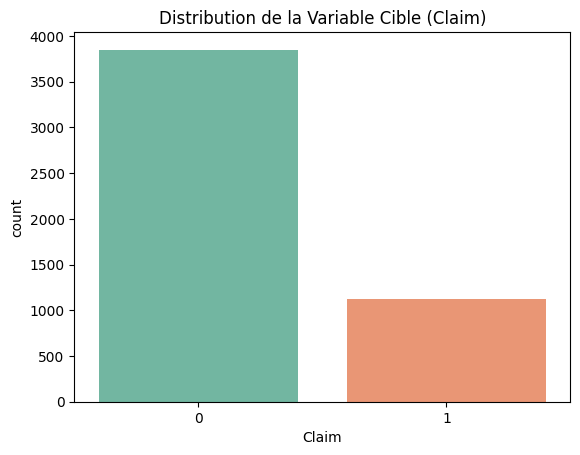

In [48]:
# Distribution de la variable cible
sns.countplot(data=Insurance_df, x='Claim', palette='Set2')
plt.title("Distribution de la Variable Cible (Claim)")
plt.show()


**Applying label encoding to 'Geo_Code'**

In [49]:
le = LabelEncoder()
# Appliquer l'encodage
Insurance_df['Geo_Code'] = le.fit_transform(Insurance_df['Geo_Code'])


**Visualize the correlation matrix**

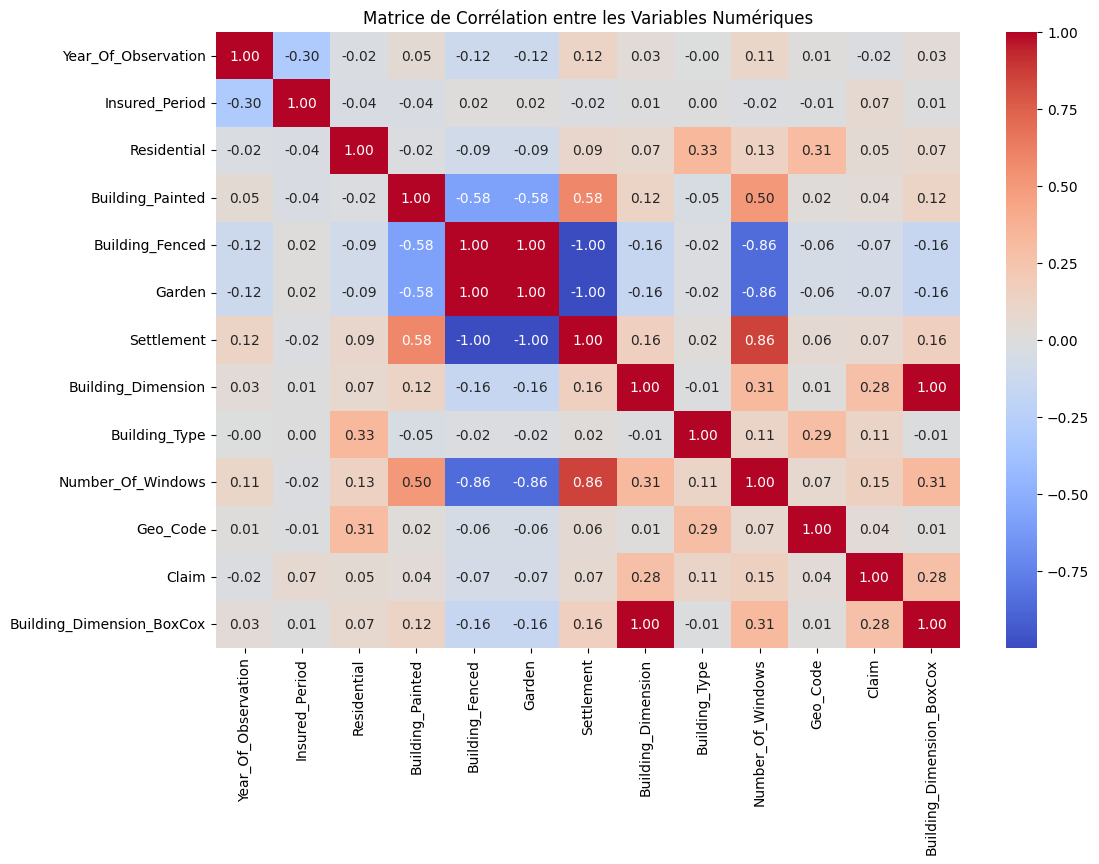

In [50]:
plt.figure(figsize=(12, 8))
sns.heatmap(Insurance_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation entre les Variables Numériques")
plt.show()

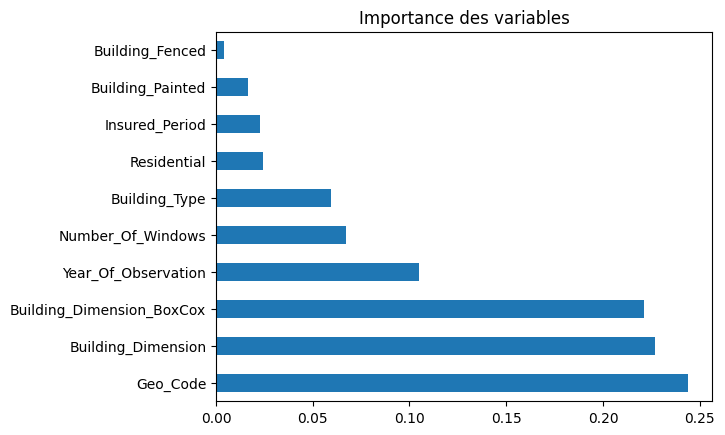

In [51]:
# Séparer les features et la target
X = Insurance_df.drop(['Claim'], axis=1)
Y= Insurance_df['Claim']

# Appliquer un modèle de forêt aléatoire pour obtenir l'importance des variables
model = RandomForestClassifier(random_state=42)
model.fit(X, Y)

# Importance des variables
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Importance des variables")
plt.show()

## **Model Building**
---

**Handling class imbalance**





**Solution 1: Upsample the minority class to match the majority class size**

In [52]:
Insurance_df=preprocess_data(Insurance_df)

KeyError: "['Customer Id'] not found in axis"

In [53]:
Insurance_df

,Year_Of_Observation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Number_Of_Windows,Geo_Code,Claim,Building_Dimension_BoxCox
0,2012,1.0,1,0.0,1.0,1.0,0.0,0.676875,3.0,0,795,0,13.547831
1,2012,1.0,0,0.0,1.0,1.0,0.0,0.631529,1.0,0,563,0,12.540590
2,2013,1.0,1,1.0,0.0,0.0,1.0,0.900000,1.0,4,203,1,18.503891
3,2016,0.5,0,0.0,1.0,1.0,0.0,0.577498,3.0,0,495,1,11.340446
4,2012,1.0,0,0.0,1.0,1.0,0.0,0.631529,1.0,0,464,0,12.540590
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965,2013,1.0,0,0.0,1.0,1.0,0.0,0.566369,2.0,0,222,1,11.093248
4966,2012,0.5,0,1.0,0.0,0.0,1.0,0.646173,0.0,4,27,0,12.865865
4967,2015,1.0,1,1.0,0.0,0.0,1.0,0.549277,2.0,3,1077,0,10.713596
4968,2012,0.5,0,1.0,0.0,0.0,1.0,0.563102,0.0,4,765,0,11.020679


In [54]:
# Séparer les classes majoritaire et minoritaire
df_majority = Insurance_df[Insurance_df['Claim'] == 0]
df_minority = Insurance_df[Insurance_df['Claim'] == 1]

# Suréchantillonner la classe minoritaire
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # Échantillonnage avec remise
                                 n_samples=len(df_majority),  # Égaliser le nombre avec la classe majoritaire
                                 random_state=42)  # Pour la reproductibilité

# Combiner les échantillons
Insurance_df2 = pd.concat([df_majority, df_minority_upsampled])

# Vérifier la distribution
print(Insurance_df2['Claim'].value_counts())


Claim
0    3849
1    3849
Name: count, dtype: int64


Accuracy: 0.6334405144694534
              precision    recall  f1-score   support

           0       0.62      0.65      0.64       765
           1       0.65      0.62      0.63       790

    accuracy                           0.63      1555
   macro avg       0.63      0.63      0.63      1555
weighted avg       0.63      0.63      0.63      1555



c:\Users\hp\Desktop\Assurance-Habitation-Pr-diction-Accidents\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


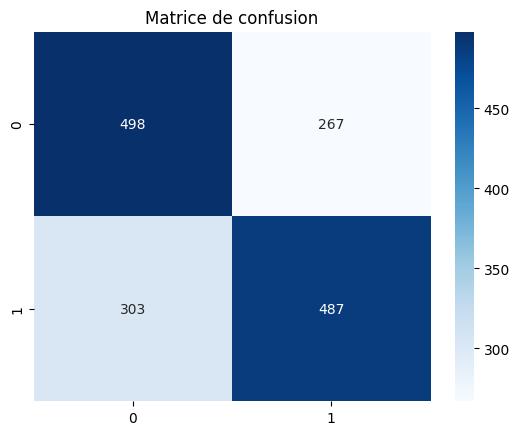

In [139]:
#X = Insurance_df2.drop(['Claim','Building_Dimension_BoxCox'], axis=1)
X = Insurance_df2.drop(['Claim'], axis=1)
Y= Insurance_df2['Claim']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
classifier = LogisticRegression(random_state=42,class_weight='balanced')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Accuracy: 0.8881028938906752
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       765
           1       0.85      0.94      0.90       790

    accuracy                           0.89      1555
   macro avg       0.89      0.89      0.89      1555
weighted avg       0.89      0.89      0.89      1555



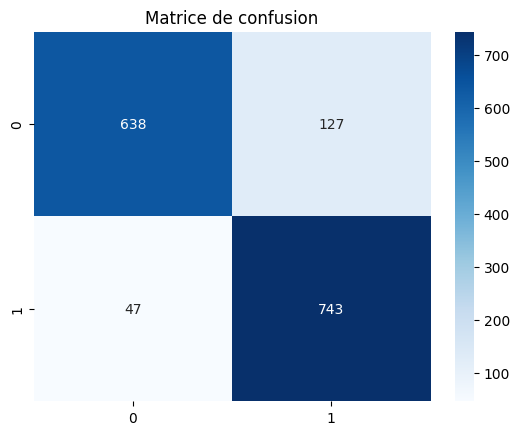

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
classifier = RandomForestClassifier(random_state=42,class_weight='balanced')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

**Solution 2: Apply SMOTE to create synthetic samples for the minority class**

In [ ]:
# Diviser les données en X (features) et y (target)
X2 = Insurance_df.drop('Claim', axis=1)
y2 = Insurance_df['Claim']

# Appliquer SMOTE pour générer de nouvelles instances synthétiques
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X2, y2)

Insurance_df3=pd.concat([X_resampled, y_resampled], axis=1)

# Vérifier la distribution après SMOTE
print(pd.Series(y_resampled).value_counts())
print(Insurance_df3.shape)

Claim
0    3886
1    3886
Name: count, dtype: int64
(7772, 13)


In [55]:
X = Insurance_df3.drop(['Claim'], axis=1)
Y = Insurance_df3['Claim']

Accuracy: 0.6488745980707395
              precision    recall  f1-score   support

           0       0.63      0.66      0.64       750
           1       0.67      0.64      0.65       805

    accuracy                           0.65      1555
   macro avg       0.65      0.65      0.65      1555
weighted avg       0.65      0.65      0.65      1555



c:\Users\hp\Desktop\Assurance-Habitation-Pr-diction-Accidents\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


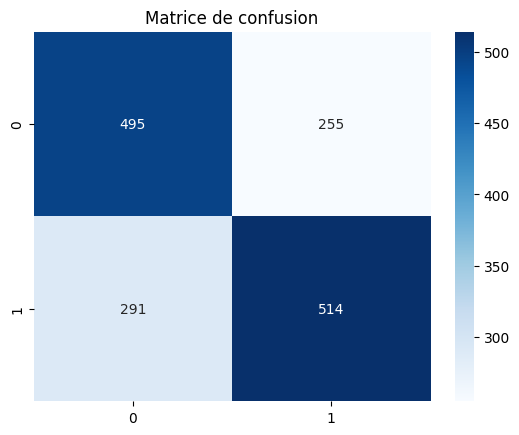

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
classifier = LogisticRegression(random_state=42,class_weight='balanced')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

In [281]:
X_train

,Year_Of_Observation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Number_Of_Windows,Geo_Code,Building_Dimension_BoxCox
5844,2014,1.000000,0,0.771323,0.228677,0.228677,0.771323,0.843524,2.000000,3,489,17.311118
2570,2013,1.000000,0,0.000000,1.000000,1.000000,0.000000,0.493191,3.000000,0,527,9.500567
3939,2012,1.000000,1,1.000000,0.000000,0.000000,1.000000,0.754515,2.000000,5,1025,15.326687
6761,2013,1.000000,0,1.000000,0.000000,0.000000,1.000000,0.803145,2.507736,3,505,16.410873
3774,2012,0.500000,1,1.000000,0.000000,0.000000,1.000000,0.572287,0.000000,3,51,11.263990
...,...,...,...,...,...,...,...,...,...,...,...,...
5226,2015,1.000000,1,0.957975,1.000000,1.000000,0.000000,0.532130,3.000000,0,783,10.368693
5390,2013,0.779321,0,1.000000,0.000000,0.000000,1.000000,0.578799,3.000000,4,524,11.409165
860,2012,1.000000,0,1.000000,1.000000,1.000000,0.000000,0.472533,0.000000,0,979,9.039997
7603,2012,1.000000,1,0.934544,0.065456,0.065456,0.934544,0.897624,1.000000,6,663,18.517265


Accuracy: 0.8057877813504823
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       750
           1       0.83      0.78      0.81       805

    accuracy                           0.81      1555
   macro avg       0.81      0.81      0.81      1555
weighted avg       0.81      0.81      0.81      1555



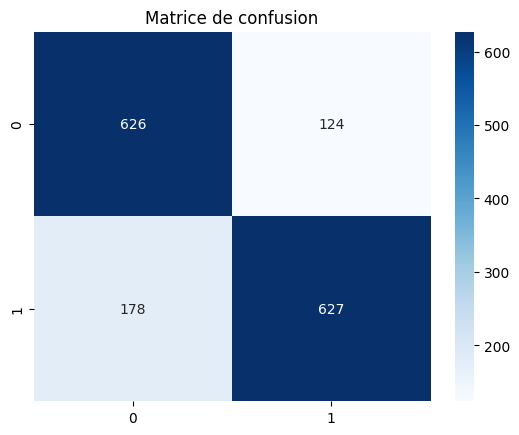

In [57]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.2, random_state=42)
classifier = RandomForestClassifier(random_state=42,class_weight='balanced')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test2, y_pred))
print(classification_report(y_test2, y_pred))
sns.heatmap(confusion_matrix(y_test2, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

In [58]:
# Define the base models
base_models = [
    ('lr', LogisticRegression()),  # Logistic Regression
    ('rf', RandomForestClassifier(random_state=42)),  # Random Forest
    ('mlp', MLPClassifier(random_state=42, max_iter=300))  # Neural Network
]


In [59]:
# Modèle méta
meta_model = GradientBoostingClassifier(random_state=42)  # Modèle de niveau supérieur

In [325]:
X_train

,Year_Of_Observation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Number_Of_Windows,Geo_Code,Building_Dimension_BoxCox
1402,2012,1.000000,1,1.000000,0.0,0.0,1.0,0.615854,1.000000,4,331,12.235288
3764,2016,0.837835,0,0.675671,1.0,1.0,0.0,0.659386,1.000000,0,254,13.205821
3878,2012,1.000000,1,1.000000,0.0,0.0,1.0,0.729581,1.000000,4,881,14.770797
3514,2013,1.000000,0,1.000000,0.0,0.0,1.0,0.565884,0.388536,2,26,11.121235
1623,2013,1.000000,1,1.000000,0.0,0.0,1.0,0.495096,0.000000,3,744,9.543027
...,...,...,...,...,...,...,...,...,...,...,...,...
3444,2013,1.000000,0,1.000000,1.0,1.0,0.0,0.618919,1.000000,0,63,12.303628
466,2014,1.000000,1,1.000000,0.0,0.0,1.0,0.624116,0.000000,3,428,12.419480
3092,2013,1.000000,0,0.287462,1.0,1.0,0.0,0.874298,3.000000,0,524,17.997203
3772,2012,1.000000,1,1.000000,0.0,0.0,1.0,0.867210,0.000000,4,934,17.839195


In [60]:
# Construction du modèle de stacking
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
# Entraîner le modèle de stacking
stacking_model.fit(X_train, y_train)

c:\Users\hp\Desktop\Assurance-Habitation-Pr-diction-Accidents\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hp\Desktop\Assurance-Habitation-Pr-diction-Accidents\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('mlp',
                                MLPClassifier(max_iter=300, random_state=42))],
                   final_estimator=GradientBoostingClassifier(random_state=42))

In [62]:
y_pred = stacking_model.predict(X_test)
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy du modèle de stacking : {accuracy * 100:.2f}%")
print("Rapport de classification:\n", report)

Accuracy du modèle de stacking : 73.25%
Rapport de classification:
               precision    recall  f1-score   support

           0       0.79      0.61      0.69       750
           1       0.70      0.85      0.77       805

    accuracy                           0.73      1555
   macro avg       0.74      0.73      0.73      1555
weighted avg       0.74      0.73      0.73      1555



In [328]:
test=pd.read_csv("test_Insurance.csv")

In [7]:
def preprocess_data(df):
    # Rename columns for better readability
    df.rename(columns={
        'YearOfObservation': 'Year_Of_Observation', 
        'Building Dimension': 'Building_Dimension', 
        'NumberOfWindows': 'Number_Of_Windows'
    }, inplace=True)

    # Drop the 'Customer Id' column
    df = df.drop(columns=['Customer Id'])

    # Handle missing values
    mf_imputer = SimpleImputer(strategy='most_frequent')
    for col in ['Geo_Code', 'Garden']:
        df[col] = mf_imputer.fit_transform(df[[col]]).flatten()

    median_imputer = SimpleImputer(strategy='median')
    df['Building_Dimension'] = median_imputer.fit_transform(df[['Building_Dimension']]).flatten()

    # Encode categorical variables
    ord_categories = [["N", "V"], ["N", "V"], ["O", "V"], ['U', 'R'], 
                      ['Fire-resistive', 'Non-combustible', 'Ordinary', 'Wood-framed']]
    enc1 = OrdinalEncoder(categories=ord_categories)
    df[["Building_Painted", "Building_Fenced", "Garden", 'Settlement', 'Building_Type']] = enc1.fit_transform(
        df[["Building_Painted", "Building_Fenced", "Garden", 'Settlement', 'Building_Type']]
    )

    # Replace categorical values in 'Number_Of_Windows' and convert to integer
    df["Number_Of_Windows"] = df["Number_Of_Windows"].replace({'without': '0', '>=10': '10'}).astype(int)

    # Encode the target variable 'Claim'
    df['Claim'] = df['Claim'].apply(lambda x: 1 if x == 'oui' else 0)

    # Handle outliers in 'Building_Dimension'
    Q1, Q3 = np.percentile(df["Building_Dimension"], [25, 75])
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    df['Building_Dimension'] = np.where(
        df['Building_Dimension'] >= upper_limit, upper_limit,
        np.where(df['Building_Dimension'] <= lower_limit, lower_limit, df['Building_Dimension'])
    )

    # Apply Box-Cox Transformation
    df['Building_Dimension_BoxCox'], _ = boxcox(df['Building_Dimension'] + 1)  # +1 to avoid zero values

    # Apply Min-Max Scaling
    scaler = MinMaxScaler(feature_range=(0.1, 0.9))
    df['Building_Dimension'] = scaler.fit_transform(df[['Building_Dimension_BoxCox']])

    # Label encoding for 'Geo_Code'
    le = LabelEncoder()
    df['Geo_Code'] = le.fit_transform(df['Geo_Code'])

    return df

In [329]:
test_processed=preprocess_data(test)

In [330]:
test_processed

,Year_Of_Observation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Number_Of_Windows,Geo_Code,Claim,Building_Dimension_BoxCox
0,2013,1.0,0,1.0,1.0,1.0,0.0,0.855251,0.0,0,229,1,12.733117
1,2015,1.0,0,1.0,0.0,0.0,1.0,0.700500,0.0,5,283,0,10.678814
2,2013,1.0,1,1.0,0.0,0.0,1.0,0.746410,2.0,6,647,1,11.288264
3,2015,1.0,0,0.0,1.0,1.0,0.0,0.771350,1.0,0,54,1,11.619342
4,2016,0.5,0,1.0,0.0,0.0,1.0,0.815849,0.0,9,260,0,12.210058
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,2016,0.5,1,1.0,0.0,0.0,1.0,0.621722,3.0,2,334,0,9.633034
2143,2012,1.0,0,1.0,1.0,1.0,0.0,0.658045,1.0,0,322,0,10.115222
2144,2014,1.0,0,1.0,0.0,0.0,1.0,0.597463,1.0,3,401,0,9.311008
2145,2014,1.0,1,0.0,1.0,1.0,0.0,0.561601,1.0,0,405,1,8.834933


In [331]:

Xt= test_processed.drop(['Claim'], axis=1)
Yt= test_processed['Claim']


In [293]:
Xt

,Year_Of_Observation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Number_Of_Windows,Geo_Code,Building_Dimension_BoxCox
0,2013,1.0,0,1.0,1.0,1.0,0.0,0.855251,0.0,0,229,12.733117
1,2015,1.0,0,1.0,0.0,0.0,1.0,0.700500,0.0,5,283,10.678814
2,2013,1.0,1,1.0,0.0,0.0,1.0,0.746410,2.0,6,647,11.288264
3,2015,1.0,0,0.0,1.0,1.0,0.0,0.771350,1.0,0,54,11.619342
4,2016,0.5,0,1.0,0.0,0.0,1.0,0.815849,0.0,9,260,12.210058
...,...,...,...,...,...,...,...,...,...,...,...,...
2142,2016,0.5,1,1.0,0.0,0.0,1.0,0.621722,3.0,2,334,9.633034
2143,2012,1.0,0,1.0,1.0,1.0,0.0,0.658045,1.0,0,322,10.115222
2144,2014,1.0,0,1.0,0.0,0.0,1.0,0.597463,1.0,3,401,9.311008
2145,2014,1.0,1,0.0,1.0,1.0,0.0,0.561601,1.0,0,405,8.834933


In [332]:
pred2=stacking_model.predict(Xt)

In [333]:
# Évaluer le modèle
accuracy = accuracy_score(Yt,pred2)
report = classification_report(Yt, pred2)
print(f"Accuracy du modèle de stacking : {accuracy * 100:.2f}%")
print("Rapport de classification:\n", report)

Accuracy du modèle de stacking : 71.87%
Rapport de classification:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83      1639
           1       0.36      0.23      0.28       508

    accuracy                           0.72      2147
   macro avg       0.57      0.55      0.55      2147
weighted avg       0.68      0.72      0.70      2147



In [353]:
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [354]:
predrandomForest=rf_model.predict(Xt)

c:\Users\hp\Desktop\Assurance-Habitation-Pr-diction-Accidents\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [355]:
# Évaluer le modèle
accuracy = accuracy_score(Yt,predrandomForest)
report = classification_report(Yt, predrandomForest)
print(f"Accuracy du modèle de RandomForestClassifier : {accuracy * 100:.2f}%")
print("Rapport de classification:\n", report)

Accuracy du modèle de RandomForestClassifier : 23.66%
Rapport de classification:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1639
           1       0.24      1.00      0.38       508

    accuracy                           0.24      2147
   macro avg       0.12      0.50      0.19      2147
weighted avg       0.06      0.24      0.09      2147



c:\Users\hp\Desktop\Assurance-Habitation-Pr-diction-Accidents\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\Desktop\Assurance-Habitation-Pr-diction-Accidents\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\Desktop\Assurance-Habitation-Pr-diction-Accidents\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [337]:
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=25, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=25, random_state=42)

In [338]:
dt_prediction=dt_model.predict(Xt)

In [339]:
# Évaluer le modèle
accuracy = accuracy_score(Yt,dt_prediction)
report = classification_report(Yt, dt_prediction)
print(f"Accuracy du modèle de stacking : {accuracy * 100:.2f}%")
print("Rapport de classification:\n", report)

Accuracy du modèle de stacking : 60.92%
Rapport de classification:
               precision    recall  f1-score   support

           0       0.81      0.64      0.71      1639
           1       0.31      0.52      0.39       508

    accuracy                           0.61      2147
   macro avg       0.56      0.58      0.55      2147
weighted avg       0.69      0.61      0.64      2147



In [340]:
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=16, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=16, random_state=42)

In [341]:
dt_prediction=dt_model.predict(Xt)

In [342]:
# Évaluer le modèle
accuracy = accuracy_score(Yt,dt_prediction)
report = classification_report(Yt, dt_prediction)
print(f"Accuracy du modèle de stacking : {accuracy * 100:.2f}%")
print("Rapport de classification:\n", report)

Accuracy du modèle de stacking : 63.67%
Rapport de classification:
               precision    recall  f1-score   support

           0       0.79      0.72      0.75      1639
           1       0.29      0.38      0.33       508

    accuracy                           0.64      2147
   macro avg       0.54      0.55      0.54      2147
weighted avg       0.67      0.64      0.65      2147



In [343]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [344]:
svm_model = SVC(kernel="rbf", C=1, gamma="scale", random_state=42)
svm_model.fit(X_train, y_train)


SVC(C=1, random_state=42)

In [345]:
svm_pred=svm_model.predict(Xt)

c:\Users\hp\Desktop\Assurance-Habitation-Pr-diction-Accidents\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [346]:
# Évaluer le modèle
accuracy = accuracy_score(Yt,svm_pred)
report = classification_report(Yt, svm_pred)
print(f"Accuracy du modèle de stacking : {accuracy * 100:.2f}%")
print("Rapport de classification:\n", report)

Accuracy du modèle de stacking : 76.34%
Rapport de classification:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87      1639
           1       0.00      0.00      0.00       508

    accuracy                           0.76      2147
   macro avg       0.38      0.50      0.43      2147
weighted avg       0.58      0.76      0.66      2147



c:\Users\hp\Desktop\Assurance-Habitation-Pr-diction-Accidents\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\Desktop\Assurance-Habitation-Pr-diction-Accidents\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\Desktop\Assurance-Habitation-Pr-diction-Accidents\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [317]:
def test_decision_tree_depth(X_train, y_train, Xt,yt, max_depth_range):
    """
    Teste les performances d'un DecisionTreeClassifier pour différentes valeurs de max_depth.

    Args:
        X_train (array-like): Ensemble d'entraînement (caractéristiques).
        y_train (array-like): Ensemble d'entraînement (cible).
        X_test (array-like): Ensemble de test (caractéristiques).
        y_test (array-like): Ensemble de test (cible).
        max_depth_range (list): Liste des valeurs de max_depth à tester.

    Affiche une courbe des performances en fonction de max_depth.
    """
    train_accuracies = []
    test_accuracies = []
    
    for depth in max_depth_range:
        # Création et entraînement du modèle
        dt_model = DecisionTreeClassifier(criterion="gini", max_depth=depth, random_state=42)
        dt_model.fit(X_train, y_train)
        
        # Évaluation des performances
        train_pred = dt_model.predict(X_train)
        test_pred = dt_model.predict(X_test)
        train_accuracies.append(accuracy_score(y_train, train_pred))
        test_accuracies.append(accuracy_score(y_test, test_pred))
    
    # Affichage des résultats
    plt.figure(figsize=(10, 6))
    plt.plot(max_depth_range, train_accuracies, label="Accuracy - Training Set", marker="o", linestyle="--")
    plt.plot(max_depth_range, test_accuracies, label="Accuracy - Test Set", marker="o", linestyle="-")
    plt.title("Impact de max_depth sur la précision")
    plt.xlabel("Valeur de max_depth")
    plt.ylabel("Précision")
    plt.legend()
    plt.grid(True)
    plt.show()

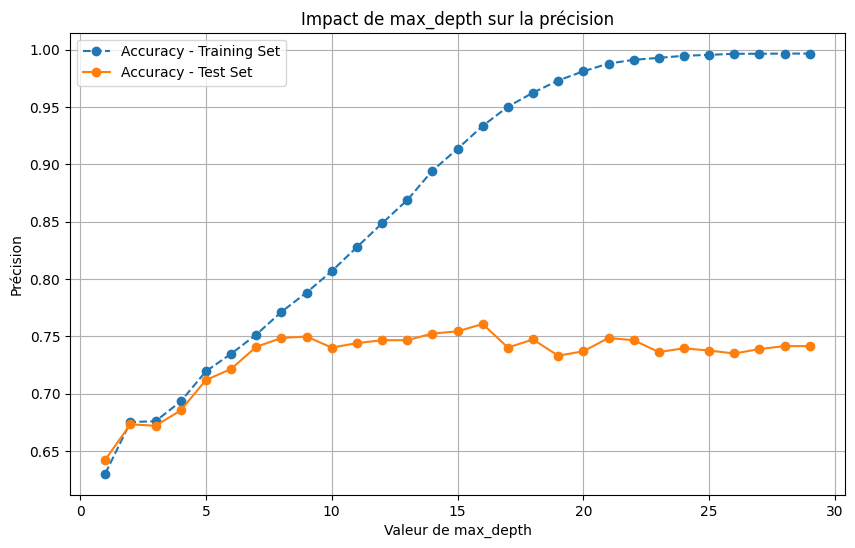

In [318]:
test_decision_tree_depth(X_train, y_train, Xt, Yt, max_depth_range=range(1, 30))